### 2.2 Data Analysis with Pandas
##### 1. Loading dataframes from different sources
##### 2. Operations on Columns
##### 3. Operations on DataFrames
##### 4. Visualization on DataFrames (Module 2.3 later)

In [263]:
# conventional way to import pandas
import pandas as pd

### 1. Reading Data from different sources and understanding meta data
    -formats: 
        tsv, csv, excel, json,etc 
    -sources
        web, local file system, sql server, etc
    -operations on reading
        columns naming, header, skipping rows, reading fix number of row, etc
    -functions
        pd.read_table, pd.read_csv, pd.read_excel, pd.read_csv, pd.read_sql

In [264]:
# read a dataset of Chipotle orders directly from a URL and store the results in a DataFrame
dfOrders = pd.read_table('http://bit.ly/chiporders')

In [268]:
#now we look at some elements in data
dfOrders.head(10);

In [272]:
#nex read a dataset of Chipotle orders directly from a file stored on disk and store the results in a DataFrame
dfOrders = pd.read_table('data/chipotle.tsv')
#type(dfOrders)
dfOrders.head();

In [274]:
#reading from an excel file
dfML = pd.read_excel('./data/MachineLearningInExcel.xlsx')
dfML.head();

In [278]:
#EXCERCISE
#reading a specific sheet 'Daily Demand Forecast' from excel
dfML = pd.read_excel('./data/MachineLearningInExcel.xlsx', sheetname='Daily Demand Forecast')
dfML.head();

In [280]:
#reading a file that has non-default separator
dfUsers = pd.read_table('data/movieusers.tsv') # seprator '|' is not defined
dfUsers.head();

In [282]:
#Hmmm, so we should find some arguments to overcome that
dfUsers = pd.read_table('data/movieusers.tsv',sep='|')
dfUsers.head();
#ANY ISSUE?

In [284]:
dfUsers = pd.read_table('data/movieusers.tsv',sep='|', header=None) # default numbers are assigned to each column
dfUsers.head();

In [286]:
# defining user defined Column names
lstCols = ['id','age','gender','occupation','code']
dfUsers = pd.read_table('data/movieusers.tsv',sep='|', header=None,names=lstCols)
dfUsers.head();

In [287]:
# Please read skiprow and skipfooter parameter of read_table
#TRY HERE
dfUsers = pd.read_table('data/movieusers.tsv',sep='|', header=None,names=lstCols, skiprows=5);

In [290]:
#reading specific columns form a file
dfUFO = pd.read_csv('data/ufo.csv', usecols=['City','State'])
dfUFO = pd.read_csv('data/ufo.csv', usecols=[x for x in dfUFO.columns if x.startswith('C')])

#### OR ####
#ufo = pd.read_csv('data/ufo.csv', usecols=[0,3])
dfUFO.head();



In [296]:
# to read only top rows
dfUFO = pd.read_csv('data/ufo.csv')#, nrows=4)
dfUFO.head();

Two important objects in Pandas 
#### 1) Data Frame (consist of rows and cols) 
#### 2) Panda Series (cols)

In [294]:
type(dfUFO)
type(dfUFO.City)#a column or a series 
type(dfUFO["City"]) # a column or a series
#second notation is especially useful when there is SPACE in column names, also best practice for readibility
#dfUFO['Colors Reported'];

pandas.core.series.Series

#### Extracting meta data

In [297]:
# shows statistics of numeric colums
dfUFO.describe() # example of method

,City,Colors Reported,Shape Reported,State,Time
count,18220,2883,15601,18245,18245
unique,6476,27,27,52,16145
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00
freq,187,781,2803,2529,27


In [301]:
#%timeit len(dfUFO)
%timeit dfUFO.count()

100 loops, best of 3: 4.26 ms per loop


In [303]:
ufo.dtypes; # example of attribute

In [305]:
dfUFO.shape # example of attribute

(18245, 5)

In [304]:

dfUFO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18245 entries, 0 to 18244
Data columns (total 5 columns):
City               18220 non-null object
Colors Reported    2883 non-null object
Shape Reported     15601 non-null object
State              18245 non-null object
Time               18245 non-null object
dtypes: object(5)
memory usage: 712.8+ KB


In [309]:
dfUFO.index;
import sqlalchemy
#conn = sqlalchemy.create_engine()
#pd.read_sql()#

### 2. Operations on columns
- creating new columns from existing one
- renaming
- dropping


In [314]:
#getting the columns
dfUFO.columns;
dfUFO.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Belton,RED,SPHERE,SC,6/30/1939 20:00
2,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
3,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
4,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [316]:
#creating a new column as sum/concatation of two columns
dfUFO['Location'] = dfUFO.City + ' , ' + dfUFO.State
# to create a new series in DF don't use do notation, For assignment it is necessary that we should use barcket notation
dfUFO.head();

In [317]:
#renaming columns
dfUFO.rename(columns={'Colors Reported': 'Colors_Reported', 'Shape Reported':'Shape_Reported'}) 
dfUFO.columns
#WHAT?
pd.DataFrame.rename()

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time',
       'Location'],
      dtype='object')

### Excercise:
    Really renaming the columns

In [320]:
#try it
dfUFO.rename(columns={'Colors Reported': 'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True) 
dfUFO.head()

,City,Colors_Reported,Shape_Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca , NY"
1,Belton,RED,SPHERE,SC,6/30/1939 20:00,"Belton , SC"
2,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro , NJ"
3,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke , CO"
4,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene , KS"


In [321]:
# Another Methods of renaming the columns
mycol = ['city','color reported', 'shape reported','state','time', 'location']
#mycol = [x.lower() for x in dfUFO.columns]
dfUFO.columns = mycol

In [323]:
# Renaming the columns names while reading
#import pandas as pd
mycol = ['city','color reported', 'shape reported','state','time', 'location']
dfUFO = pd.read_csv('data/ufo.csv',names=mycol)
dfUFO.head()

,city,color reported,shape reported,state,time,location
0,City,Colors Reported,Shape Reported,State,Time,NaN
1,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,NaN
2,Belton,RED,SPHERE,SC,6/30/1939 20:00,NaN
3,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,NaN
4,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,NaN


In [325]:
# Assume you have thousands of col with spaces in between
dfUFO.columns = dfUFO.columns.str.replace(' ','_')
dfUFO.columns
dfUFO.head()

,city,color_reported,shape_reported,state,time,location
0,City,Colors Reported,Shape Reported,State,Time,NaN
1,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,NaN
2,Belton,RED,SPHERE,SC,6/30/1939 20:00,NaN
3,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,NaN
4,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,NaN


In [335]:
# use axis = 1 to drop column
#dfUFO.drop('shape_reported', axis=1); 
#WHAT?
dfUFO.head()

,city,color_reported,state,time,location
0,City,Colors Reported,State,Time,NaN
1,Ithaca,NaN,NY,6/1/1930 22:00,NaN
2,Belton,RED,SC,6/30/1939 20:00,NaN
3,Willingboro,NaN,NJ,6/30/1930 20:00,NaN
4,Holyoke,NaN,CO,2/15/1931 14:00,NaN


In [333]:
#Ex. Really dropping the column 'location'
#Try it
#dfUFO.drop('shape_reported', axis=1, inplace=True); 
dfUFO.head();

In [337]:
# to drop multiple columns, 'city' and 'time'
#Try it
dfUFO.drop(labels=['city', 'time'], axis=1, inplace=True)
dfUFO.head()

,color_reported,state,location
0,Colors Reported,State,NaN
1,NaN,NY,NaN
2,RED,SC,NaN
3,NaN,NJ,NaN
4,NaN,CO,NaN


In [99]:
#how about dropping rows? 0 and 1
#Try it

### Excerise:
    Please read the data from imdb_1000 and calculate sum of star_rating and max duration of movie ???

In [342]:
dfMovies = pd.read_csv('data/imdb_1000.csv')
dfMovies.head()
dfMovies.star_rating.sum()#
sum(dfMovies.star_rating)
import numpy as np
np.sum(dfMovies.star_rating)
dfMovies.sum()
dfMovies.count()

star_rating       979
title             979
content_rating    976
genre             979
duration          979
actors_list       979
dtype: int64

### 3. Some DataFrame Operations
- subselecting dataframe columns
- Sorting data frame by one or more columns
- Filtering data
- Iterating over dataframe
- grouping / groupby
- merging and concatinating dataframes
- handling missing values


In [348]:
import pandas as pd
dfMovies = pd.read_csv('data/imdb_1000.csv')
dfMovies.head();



In [347]:
#3.0 subselecting dataframe over some columns 
dfMovies2 = dfMovies[['title', 'genre']].copy();#dataframe[list of columns]
dfMovies2.head();
dfMovies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### 3.1 Sorting

In [353]:
#sorting above dataframe by movie titles in ascending and descending order
dfMovies['title'].sort_values(ascending=False); # it returns panda series and default is assending order
#in both orders

In [356]:
# sorting by mulitple columns in different orders e.g. star_rating, title
#Try It
dfMovies.sort_values(['star_rating', 'title'], ascending=[False, True]);



#### 3.2 Filtering

#### Excercise: select movies with duration above 200 minutes

In [125]:
# conventional appraoch-first create filter, then get data
bl = []
for d in dfMovies.duration:
    if d>=200:
        bl.append(True)
    else:
        bl.append(False)
len(bl)
#Ex
#did you notice something interesting construct above

979

In [126]:
bl[0:5];
dfMovies[bl];#accesssing the list on True points

In [359]:
# simple version - Slicing inside dataframe
dfMovies[dfMovies.duration >= 200];

##### How to get values of certain column after filtering

In [120]:
#dfMovies[dfMovies.duration>=200].duration
#dfMmovies[dfMovies.duration>=200]['duration']
dfMovies.loc[dfMovies.duration>=200, 'duration'] # recommended approach

##### Apply Multiple filters

In [360]:
#movies[movies.duration>=200 & movies.genre=='Crime'] # this will not work
dfMovies[(dfMovies.duration>=200) & (dfMovies.genre=='Crime')] 

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."


##### Movies with genere in 'Drama','Crime', or 'Action'

In [363]:
# if we use multiple condition on single attribute 
dfMovies[dfMovies.genre.isin(['Drama','Crime','Action'])];

#### 3.3 iterating over series, dataframe rows

In [369]:
# how to iterate DF and series
dfMovies = pd.read_csv('data/imdb_1000.csv', nrows=5)
#movies.head()

# for series
for d in dfMovies.duration:
    pass
    #print (d);

# for DF
for idx, r in dfMovies.iterrows():
    print(r['title'])
    break
    print (idx, r.star_rating, r.title);
    
for i in range(len(dfMovies)):
    print(i, dfMovies.iloc[i])#['title'])
    break
    

The Shawshank Redemption
0 star_rating                                                     9.3
title                                      The Shawshank Redemption
content_rating                                                    R
genre                                                         Crime
duration                                                        142
actors_list       [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
Name: 0, dtype: object


#### 3.4 Group By

In [384]:
#Syntax of Groupby --> df.Groupby(by=Index_Columns)[AggregatorColumns].AggegrateOperation
import numpy as np
#dfMovies = pd.read_csv('data/imdb_1000.csv')
#dfMovies.groupby(by='genre').count()#
#dfMovies.groupby(by='genre', as_index=False, sort=False).count()#
#dfMovies.groupby('genre')['star_rating'].count()#
#dfMovies.groupby('genre', as_index=False)['star_rating', 'duration'].count()#one aggregation type on multiple colums 
#dfMovies.groupby('genre')['star_rating', 'duration'].agg(len) #another way of one multiple aggregation
#dfMovies.groupby('genre')['star_rating', 'duration'].agg([np.shape, np.max]) #applying two aggregation on two columns
dfMovies.groupby('genre')['star_rating', 'duration'].agg({'num': len, 'max_length':np.max}) #applying two aggregation on two columns
#dfMovies.groupby('genre', as_index=False, sort=False)['star_rating', 'duration'].agg({'num': len, 'max_length':np.max}).reset_index() #applying two aggregation on two columns

#dfMovies.head()


num           max_length         
          star_rating duration star_rating duration
genre                                              
Action          136.0      136         9.0      205
Adventure        75.0       75         8.9      224
Animation        62.0       62         8.6      134
Biography        77.0       77         8.9      202
Comedy          156.0      156         8.6      187
Crime           124.0      124         9.3      229
Drama           278.0      278         8.9      242
Family            2.0        2         7.9      115
Fantasy           1.0        1         7.7      112
Film-Noir         3.0        3         8.3      111
History           1.0        1         8.0       66
Horror           29.0       29         8.6      146
Mystery          16.0       16         8.6      160
Sci-Fi            5.0        5         8.2      132
Thriller          5.0        5         8.0      120
Western           9.0        9         8.9      175

#### Excercise: Which kind of movies are most liked by audience (star_rating)

In [386]:
dfMovies.groupby(by=['genre'])['star_rating'].mean();

In [387]:
%matplotlib inline

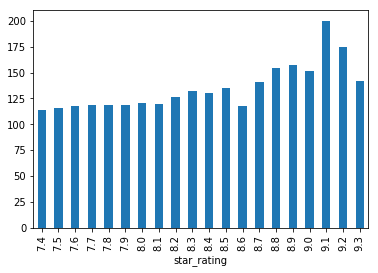

In [391]:
dfMovies.groupby('star_rating')['duration'].mean().plot(kind='bar');

#### Does duration impact on star_rating?

In [254]:
dfMovies.groupby(by=['star_rating'], as_index=False, sort=False)['duration'].mean().sort_values('duration', ascending=False);

#### could life be a bit better by not doing above?

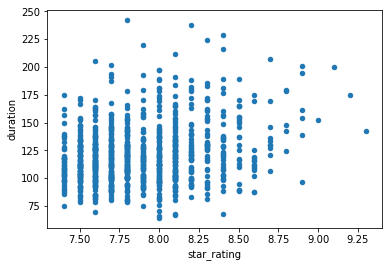

In [392]:
dfMovies.plot(x='star_rating', y ='duration', kind='scatter')

#### 3.5 DataFrame merging and concatinations

In [258]:
# See in solution
df1 , df2
df3 = pd.merge(df1, df2, how='left/inner/outer/right', left_on=['col1'], right_on, suffixes=('_user', ''))

df3 = pd.concat([df1, df2], axis=0)#when dfs are similar
df2 = df

#### 3.5 Handeling missing values
- finding null/notnull values
- dropping null values
- missing null values

In [256]:
import pandas as pd
dfUFO = pd.read_csv('data/ufo.csv')
dfUFO.tail();

In [214]:
#getting for each columns mask of null values
dfUFO.isnull().tail();

In [215]:
#the not null values
dfUFO.notnull().tail();

In [216]:
dfUFO.isnull().sum(); # returns no. of sums of missing values

In [217]:
#slicing a dataframe for null/notnull values
dfUFO[dfUFO.City.isnull()];
dfUFO[dfUFO.City.notnull()];

In [145]:
# drops all rows that contains ANY of five columns have missing value
dfUFO.dropna(how='any').shape 

(2487, 5)

In [207]:
# drops all rows that contains ALL of five columns have missing value
dfUFO.dropna(how='all').shape 

(18245, 5)

In [208]:
# drops all rows that contains ANY of two columns have missing values
dfUFO.dropna(subset=['City', 'Shape Reported'], how='any').shape 

(15580, 5)

In [220]:
# replace NaN with No
#dfUFO['Shape Reported'].fillna(value='No', inplace=True) 
#dfUFO['Shape Reported'].fillna(value='No', inplace=True, method=None) # replace NaN with No,


In [224]:
dfUFO.drop_duplicates(keep='first');

##### 3.8More operations
- loc and iloc
- copy
- lambda notation
- map/reduce on series/dataframe
- display options

In [225]:
# finally, replace the 'NOT RATED' values with 'NaN' (imported from NumPy)
import numpy as np
dfMovies[dfMovies.content_rating=='NOT RATED'].content_rating = np.nan

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Problem: That statement involves two operations, a __getitem__ and a __setitem__. pandas can't guarantee whether the __getitem__ operation returns a view or a copy of the data.
If __getitem__ returns a view of the data, __setitem__ will affect the 'movies' DataFrame.
But if __getitem__ returns a copy of the data, __setitem__ will not affect the 'movies' DataFrame.

In [227]:
# replace the 'NOT RATED' values with 'NaN' (does not cause a SettingWithCopyWarning)
dfMovies.loc[dfMovies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [228]:
# explicitly create a copy of 'movies'
dfTopMovies = dfMovies.loc[movies.star_rating >= 9, :].copy()

In [235]:
# pandas now knows that you are updating a copy instead of a view (does not cause a SettingWithCopyWarning)
dfTopMovies.loc[0, 'duration'] = 150

In [236]:
# 'top_movies' DataFrame has been updated
dfTopMovies;

display options

In [237]:
dfMovies; # show only sixty values

In [232]:
# check the current setting for the 'max_rows' option
pd.get_option('display.max_rows')

60

In [233]:
# overwrite the current setting so that all rows will be displayed
pd.set_option('display.max_rows', None)

In [238]:
dfMovies; # now show all rows

In [ ]:
# reset the 'max_rows' option to its default
pd.reset_option('display.max_rows')

In [239]:
dfMovies;

In [ ]:
# the 'max_columns' option is similar to 'max_rows'
pd.get_option('display.max_columns')

###### MAP / REDUCE IN PANDAS (PYTHON)

In [399]:
#create a new column in dfUFO that contains second name of the city

dfUFO['City_LastName'] = dfUFO['City'].apply(lambda x: getLast(x))
def getLast(x):
    return str(x[str(x).find(' '):]) if ' ' in str(x) else ''
dfUFO.head(20)

,City,Colors Reported,Shape Reported,State,Time,City_LastName
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,
1,Belton,RED,SPHERE,SC,6/30/1939 20:00,
2,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,
3,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,
4,Abilene,NaN,DISK,KS,6/1/1931 13:00,
5,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,York Worlds Fair
6,Valley City,NaN,DISK,ND,9/15/1934 15:30,City
7,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00,Lake
8,Alma,NaN,DISK,MI,7/15/1936 0:00,
9,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00,


In [397]:
dfUFO = pd.read_csv('data/ufo.csv')
dfUFO.City.unique()#head()

array(['Ithaca', 'Belton', 'Willingboro', ..., 'Capitola', 'Grant Park',
       'Ybor'], dtype=object)

In [253]:
#some more examples

#### x Explore panda Series (HW)

In [174]:
dfMovies = pd.read_csv('data/imdb_1000.csv')
dfMovies.head()
dfMovies.dtypes
dfMovies.describe()
dfMovies.genre.describe()
dfMovies.genre.value_counts()
dfMovies.genre.value_counts(normalize=True) # return %ages
type(dfMovies.genre.value_counts(normalize=True))
dfMovies.genre.value_counts(normalize=True).head()
dfMovies.genre.unique()#a handy operation
dfMovies.genre.nunique()

16